## Sktime - python toolbox for timeseries
https://hub.ovh2.mybinder.org/user/sktime-sktime-t-ata-global-2023-6nuse30q/tree/notebooks

In [5]:
import os, sys, re
import numpy as np
import sklearn
import sktime

import warnings
warnings.filterwarnings("ignore")

In [4]:
from sklearn.datasets import load_iris


ModuleNotFoundError: No module named 'sk'

### sktime use the intercface of sklearn to do timeseries forecasting

In [6]:
from sktime.datasets import load_airline
from sktime.forecasting.naive import NaiveForecaster
y = load_airline()

# forecasting horizon
fh = np.arange(1, 38)

# Specify the algo
forecaster = NaiveForecaster(strategy="last", sp = 12)

forecaster.fit(y)

# Querying prediction
y_pred = 

SyntaxError: invalid syntax (2441381327.py, line 14)

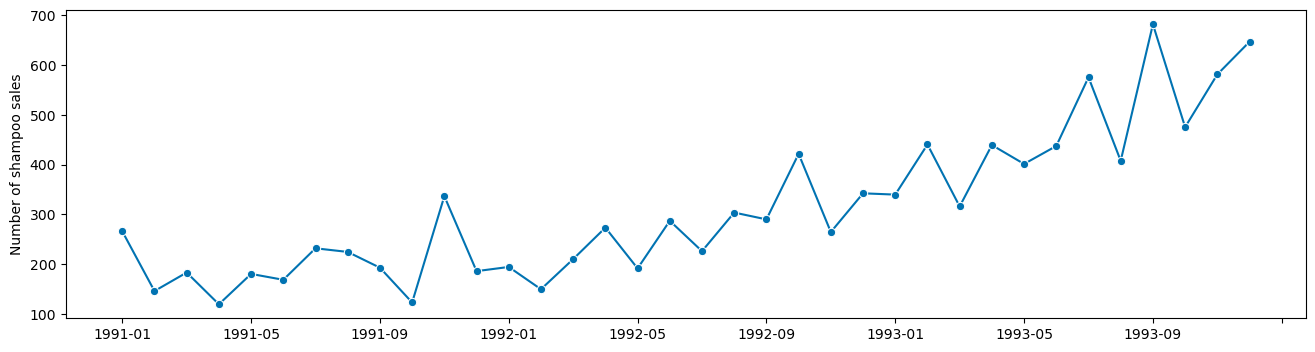

In [7]:
from sktime.datasets import load_shampoo_sales
from sktime.utils import plot_series

y = load_shampoo_sales()
_ = plot_series(y)

In [8]:
y.head()

1991-01    266.0
1991-02    145.9
1991-03    183.1
1991-04    119.3
1991-05    180.3
Freq: M, Name: Number of shampoo sales, dtype: float64

Let's split into train+test subset

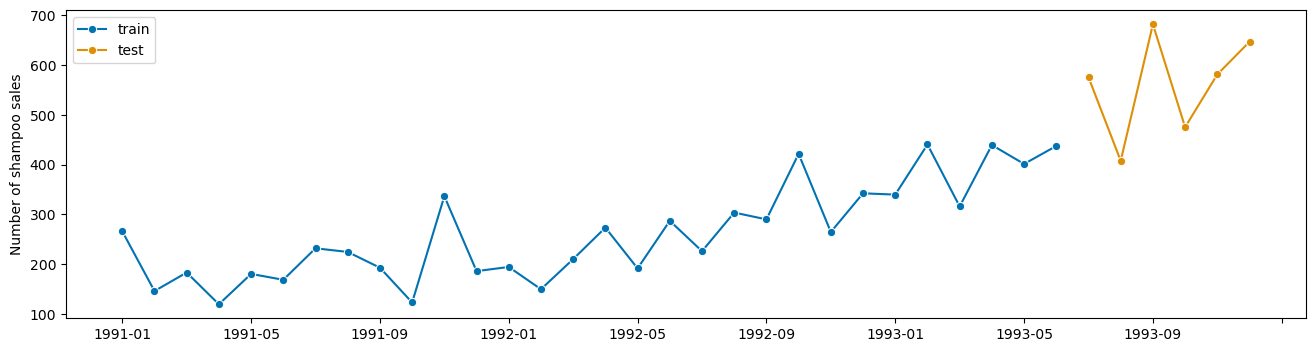

In [12]:
from sktime.split import temporal_train_test_split

# Take the last 6 data point
y_train, y_test = temporal_train_test_split(y, test_size=6)
_ = plot_series(y_train, y_test, labels = ["train", "test"])

In [13]:
y_train.head()

1991-01    266.0
1991-02    145.9
1991-03    183.1
1991-04    119.3
1991-05    180.3
Freq: M, Name: Number of shampoo sales, dtype: float64

In [14]:
y_test.head()

1993-07    575.5
1993-08    407.6
1993-09    682.0
1993-10    475.3
1993-11    581.3
Freq: M, Name: Number of shampoo sales, dtype: float64

- You should not use a random split when dealing with timeseries data

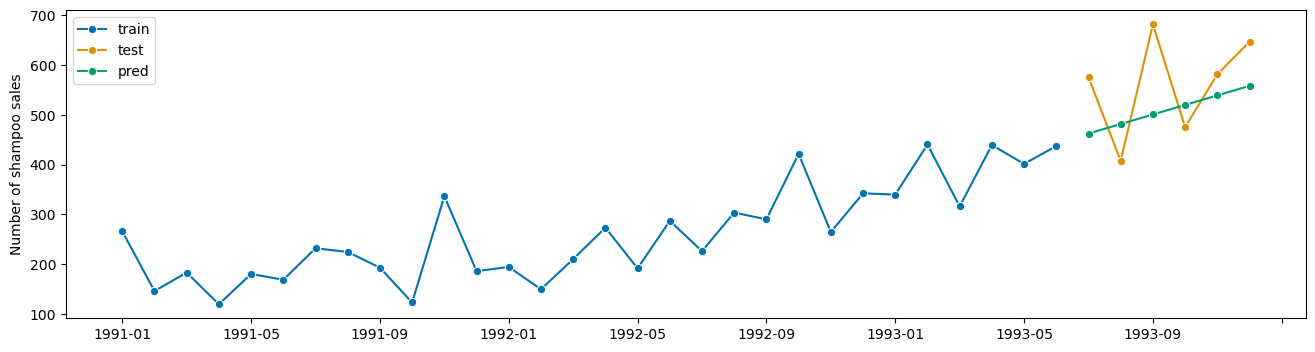

In [16]:
from sktime.forecasting.ets import AutoETS
# Define the model
forecaster = AutoETS(auto=True)

# Fit on train data
forecaster.fit(y_train)

# Use fitted model to predict for a certain forecast horizon
fh = [1, 2, 3, 4, 5, 6]
y_pred = forecaster.predict(fh=fh)
_ = plot_series(y_train, y_test, y_pred, labels = ["train", "test", "pred"])
